In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataframe=pd.read_csv("/content/Telco-Customer-Churn.csv")

In [3]:
dataframe.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
dataframe.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
dataframe.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [6]:
dataframe.shape

(7043, 21)

In [12]:
dataframe.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [8]:
dataframe.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [13]:
dataframe = dataframe.drop(['customerID'], axis = 1)
dataframe.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
dataframe['TotalCharges'] = pd.to_numeric(dataframe.TotalCharges, errors='coerce') #you set errors='coerce', you are telling pandas to replace any values that cannot be converted to a number with NaN (Not a Number) instead of raising an error.

In [17]:
dataframe.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [19]:
dataframe[np.isnan(dataframe['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Tenure column is 0 for these entries even though the MonthlyCharges column is not empty.

In [20]:
dataframe[dataframe['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')


*   There are no additional missing values in the Tenure column.
Let's delete the rows with missing values in Tenure columns since there are only 11 rows and deleting them will not affect the data.





In [22]:
dataframe.drop(dataframe[dataframe['tenure'] == 0].index, axis=0, inplace=True)
dataframe[dataframe['tenure'] == 0].index

Index([], dtype='int64')

In [25]:
dataframe.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [26]:
dataframe["SeniorCitizen"]= dataframe["SeniorCitizen"].map({0: "No", 1: "Yes"})
dataframe.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [27]:
print(dataframe["InternetService"].describe(include=['object', 'bool']))

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object


In [28]:
dataframe.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [10]:
dataframe['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869



*   Data set is highly imbalanced(ratio = 73:27).



/tmp/ipython-input-2374838104.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_percentage.index, y=churn_percentage.values, palette='viridis')


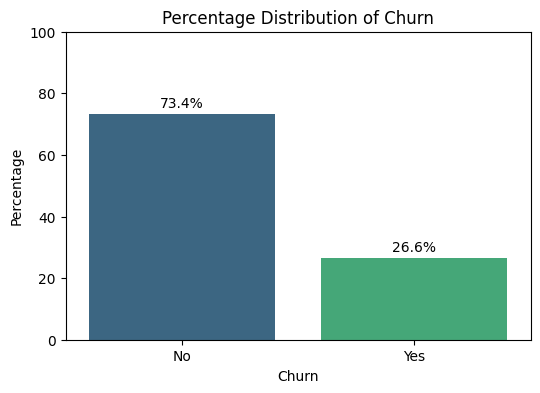

In [35]:
churn_percentage = dataframe['Churn'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 4))
sns.barplot(x=churn_percentage.index, y=churn_percentage.values, palette='viridis')
plt.title('Percentage Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Percentage')
plt.ylim(0, 100)
for i, v in enumerate(churn_percentage.values):
    plt.text(i, v + 2, f"{v:.1f}%", ha='center')
plt.show()

/tmp/ipython-input-1906758198.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_percentage.index, y=gender_percentage.values, palette='viridis')


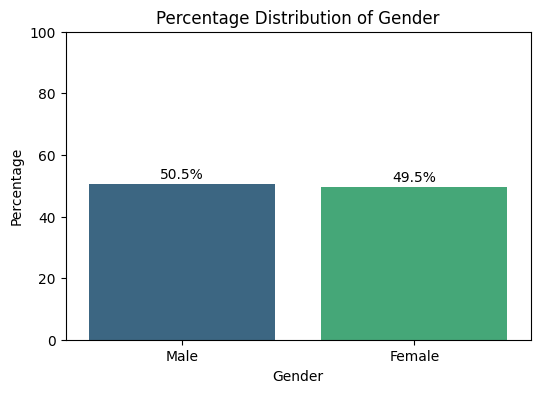

In [34]:
gender_percentage = dataframe['gender'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 4))
sns.barplot(x=gender_percentage.index, y=gender_percentage.values, palette='viridis')
plt.title('Percentage Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.ylim(0, 100)
for i, v in enumerate(gender_percentage.values):
    plt.text(i, v + 2, f"{v:.1f}%", ha='center')
plt.show()





*   26.6 % of customers switched to another firm.
*   Customers are 49.5 % female and 50.5 % male.






In [33]:
dataframe["Churn"][dataframe["Churn"]=="No"].groupby(by=dataframe["gender"]).count()

,Churn
gender,
Female,2544
Male,2619


In [36]:
dataframe["Churn"][dataframe["Churn"]=="Yes"].groupby(by=dataframe["gender"]).count()

,Churn
gender,
Female,939
Male,930


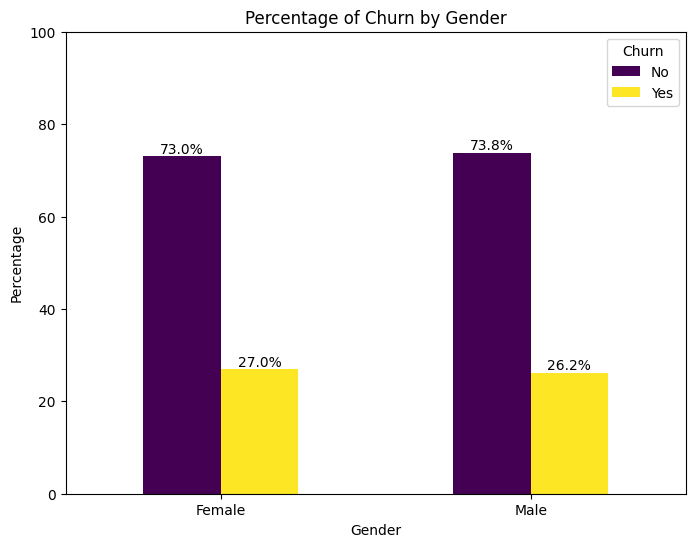

In [38]:
churn_by_gender = dataframe.groupby('gender')['Churn'].value_counts(normalize=True).unstack() * 100

churn_by_gender.plot(kind='bar', figsize=(8, 6), colormap='viridis')
plt.title('Percentage of Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.xticks(rotation=0)
plt.legend(title='Churn')

for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.1f%%')

plt.show()

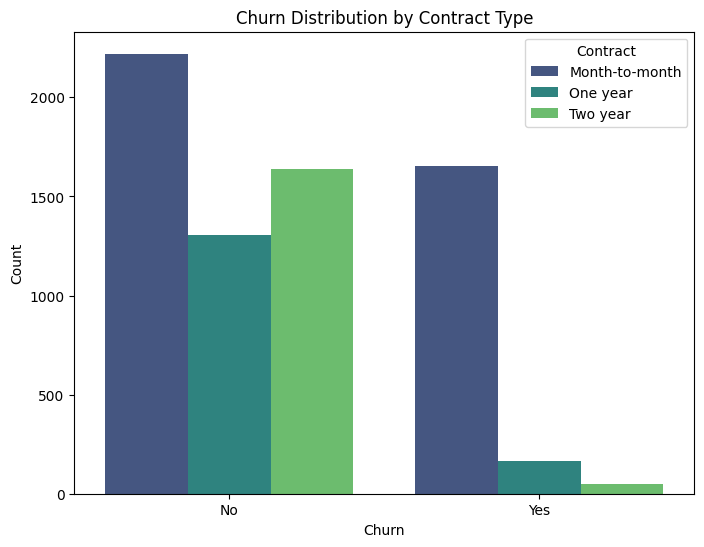

In [39]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', hue='Contract', data=dataframe, palette='viridis')
plt.title('Churn Distribution by Contract Type')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Distribution of Payment Methods')

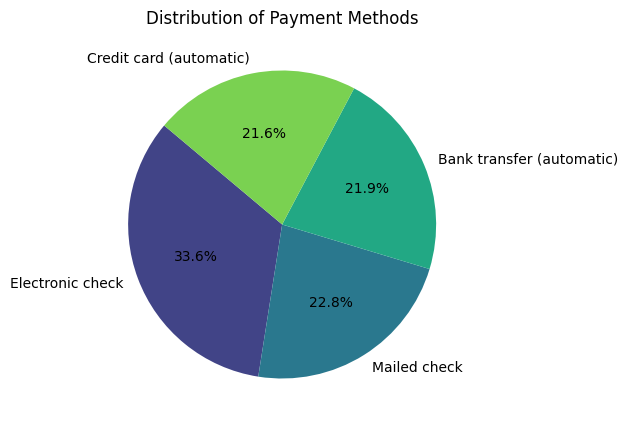

In [44]:
payment_method_counts = dataframe['PaymentMethod'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(payment_method_counts, labels=payment_method_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(payment_method_counts)))
plt.title('Distribution of Payment Methods')

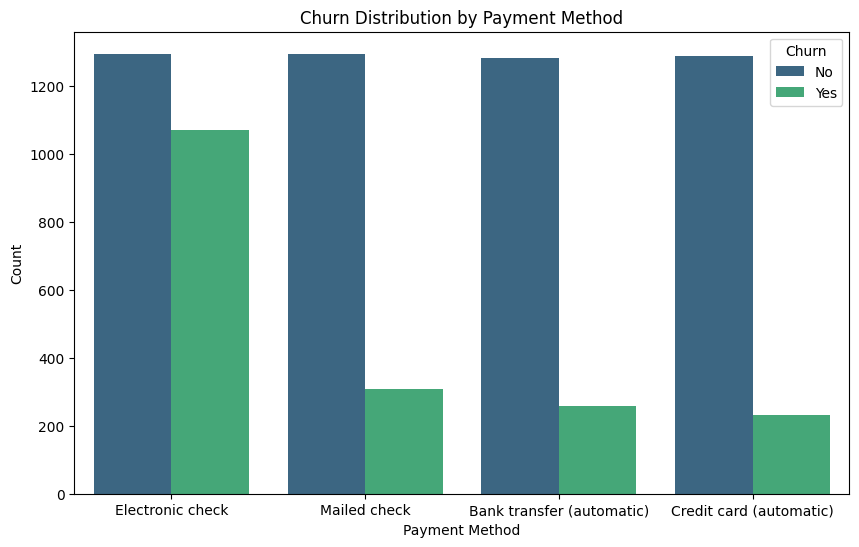

In [47]:
plt.figure(figsize=(10, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=dataframe, palette='viridis')
plt.title('Churn Distribution by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()



*   Major customers who moved out were having Electronic Check as Payment Method.
*   Customers who opted for Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out.



In [48]:
dataframe["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [49]:
 dataframe[dataframe["gender"]=="Male"][["InternetService", "Churn"]].value_counts()

,,count
InternetService,Churn,
DSL,No,992
Fiber optic,No,910
No,No,717
Fiber optic,Yes,633
DSL,Yes,240
No,Yes,57


In [50]:
dataframe[dataframe["gender"]=="Female"][["InternetService", "Churn"]].value_counts()

,,count
InternetService,Churn,
DSL,No,965
Fiber optic,No,889
No,No,690
Fiber optic,Yes,664
DSL,Yes,219
No,Yes,56


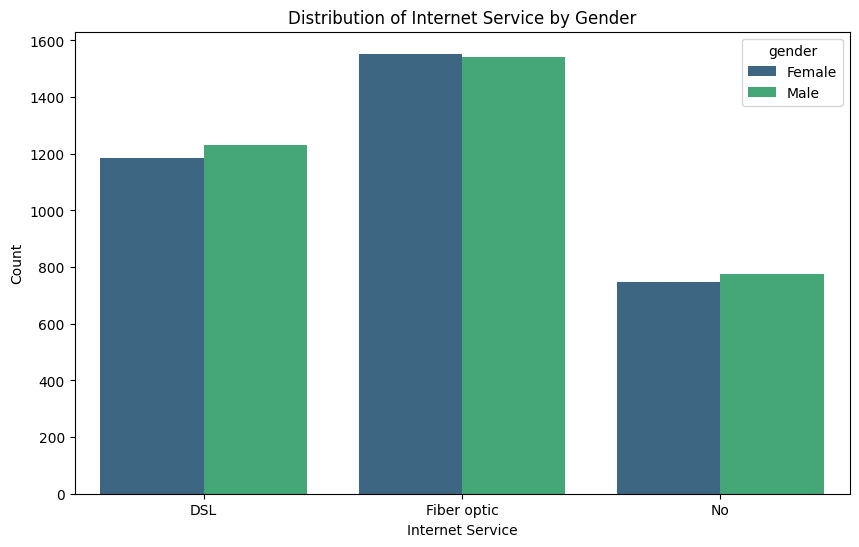

In [51]:
plt.figure(figsize=(10, 6))
sns.countplot(x='InternetService', hue='gender', data=dataframe, palette='viridis')
plt.title('Distribution of Internet Service by Gender')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.show()

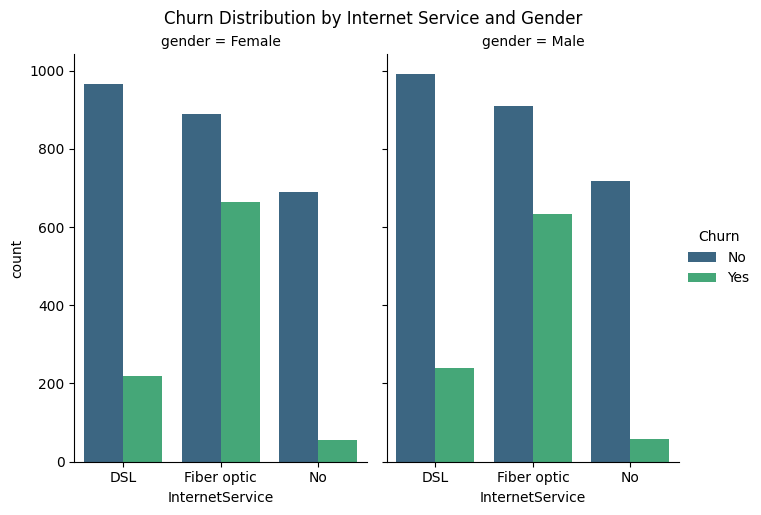

In [52]:
g = sns.catplot(x="InternetService", hue="Churn", col="gender",
                data=dataframe, kind="count", palette="viridis", height=5, aspect=.7);
g.fig.suptitle('Churn Distribution by Internet Service and Gender', y=1.02);



*   The customers who use Fiber optic have high churn rate, this might suggest a dissatisfaction with this type of internet service.
*   Customers having DSL service are majority in number and have less churn rate compared to Fibre optic service.



**What is Plotly?**

Plotly is an interactive graphing library that allows you to create a wide variety of visualizations in Python. It's known for producing interactive plots that you can zoom, pan, and hover over to see details. Plotly is often used for creating web-based dashboards or for detailed data exploration where interactivity is beneficial.

In [58]:
import plotly.express as px

color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(dataframe, x="Churn", color="Dependents", barmode="group", title="<b>Dependents distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()






*   Customers without dependents are more likely to churn





In [59]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(dataframe, x="Churn", color="Partner", barmode="group", title="<b>Chrun distribution w.r.t. Partners</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()



*  Customers that doesn't have partners are more likely to churn




In [62]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(dataframe, x="Churn", color="SeniorCitizen",barmode="group", title="<b>Chrun distribution w.r.t. Senior Citizen</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()



*   Most of the senior citizens churn.

In [64]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(dataframe, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Churn w.r.t Online Security</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()



*   Most customers churn in the absence of online security.



In [66]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(dataframe, x="Churn", color="PaperlessBilling",  title="<b>Chrun distribution w.r.t. Paperless Billing</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()



*   Customers with Paperless Billing are most likely to churn.

In [68]:
fig = px.histogram(dataframe, x="Churn", color="TechSupport",barmode="group",  title="<b>Chrun distribution w.r.t. TechSupport</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()



*  Customers with no TechSupport are most likely to migrate to another service provider.




In [70]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(dataframe, x="Churn", color="PhoneService", title="<b>Chrun distribution w.r.t. Phone Service</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()



*   Very small fraction of customers don't have a phone service and out of that, 1/3rd Customers are more likely to churn.



In [73]:
fig = px.box(dataframe, x='Churn', y='tenure', title='<b>Tenure vs Churn</b>')
fig.update_yaxes(title_text='Tenure (Months)')
fig.update_xaxes(title_text='Churn')
fig.update_layout(autosize=True, width=750, height=600,
                  title_font=dict(size=25, family='Courier'))

fig.show()



*   New customers are more likely to churn.



In [76]:
from sklearn.model_selection import train_test_split
X = dataframe.drop('Churn', axis=1)
y = dataframe['Churn']

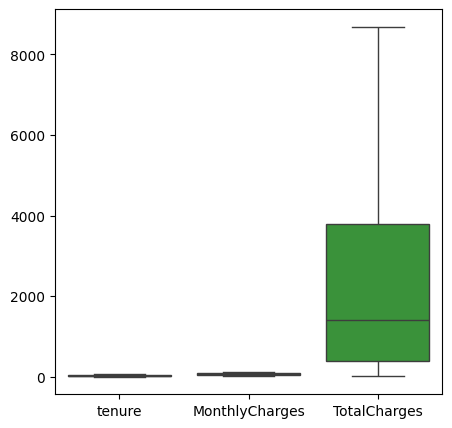

In [89]:
fig,ax=plt.subplots(figsize=(5,5))
sns.boxplot(data=X,ax=ax)
plt.savefig('Boxplot.jpg')

No Outliers

In [79]:
X.shape

(7032, 19)

In [81]:
y.shape

(7032,)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

Scaled numerical training data:


,tenure,MonthlyCharges,TotalCharges
983,-1.281139,0.726146,-0.970138
6565,1.170193,1.381503,1.809078
2212,-0.913439,-1.517446,-0.908597
2526,-1.281139,-1.520790,-0.999837
2751,-0.545739,-1.338561,-0.816253



Scaled numerical testing data:


,tenure,MonthlyCharges,TotalCharges
5710,1.537893,1.525280,2.417571
2513,0.802493,-1.527477,-0.542269
1078,1.088482,0.478716,1.020272
5711,-0.504884,0.866580,-0.146176
6574,-0.954295,0.843174,-0.647430


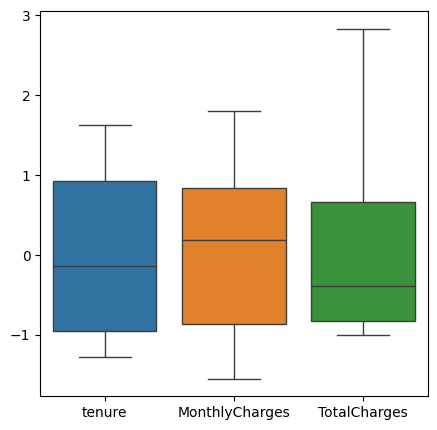

In [92]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
X_train_scaled_numerical = scaler.fit_transform(X_train[numerical_cols])

# Transform the numerical columns of the testing data using the scaler fitted on the training data
X_test_scaled_numerical = scaler.transform(X_test[numerical_cols])

# Convert the scaled numerical data back to DataFrames for easier handling
X_train_scaled_numerical = pd.DataFrame(X_train_scaled_numerical, columns=numerical_cols, index=X_train.index)
X_test_scaled_numerical = pd.DataFrame(X_test_scaled_numerical, columns=numerical_cols, index=X_test.index)

print("Scaled numerical training data:")
display(X_train_scaled_numerical.head())

print("\nScaled numerical testing data:")
display(X_test_scaled_numerical.head())


fig,ax=plt.subplots(figsize=(5,5))
sns.boxplot(data=X_train_scaled_numerical,ax=ax)
plt.savefig('Standardized Boxplot.jpg')

In [93]:
y_train.value_counts()

,count
Churn,
No,3614
Yes,1308


Data Imbalancing

*  SMOTE: synthetic data and increase the number of samples to the majority class




**Encoding Categorical Features**

We will use one-hot encoding to convert the categorical columns into numerical format.

In [94]:
categorical_cols = X_train.select_dtypes(include='object').columns.tolist()

# Apply one-hot encoding to training and testing categorical columns
X_train_encoded_categorical = pd.get_dummies(X_train[categorical_cols])
X_test_encoded_categorical = pd.get_dummies(X_test[categorical_cols])

# Ensure that the training and testing sets have the same columns after encoding
X_train_encoded_categorical, X_test_encoded_categorical = X_train_encoded_categorical.align(X_test_encoded_categorical, join='inner', axis=1, fill_value=0)

print("Encoded categorical training data:")
display(X_train_encoded_categorical.head())

print("\nEncoded categorical testing data:")
display(X_test_encoded_categorical.head())

Encoded categorical training data:


,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
983,False,True,True,False,True,False,True,False,False,True,...,True,True,False,False,False,True,False,False,True,False
6565,False,True,True,False,False,True,True,False,False,True,...,True,True,False,False,False,True,False,False,True,False
2212,False,True,True,False,True,False,True,False,False,True,...,False,False,True,False,True,False,False,False,False,True
2526,False,True,True,False,True,False,True,False,False,True,...,False,True,False,False,True,False,False,False,False,True
2751,True,False,True,False,False,True,False,True,True,False,...,False,True,False,False,False,True,False,False,False,True



Encoded categorical testing data:


,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5710,True,False,True,False,False,True,True,False,False,True,...,True,False,False,True,False,True,False,False,True,False
2513,False,True,True,False,False,True,False,True,False,True,...,False,False,False,True,True,False,False,False,False,True
1078,True,False,False,True,True,False,True,False,False,True,...,False,False,False,True,False,True,False,True,False,False
5711,True,False,False,True,False,True,True,False,False,True,...,False,True,False,False,True,False,False,False,True,False
6574,True,False,False,True,True,False,True,False,False,True,...,False,True,False,False,False,True,False,False,True,False


**Combining Scaled Numerical and Encoded Categorical Features**

Now we will combine the scaled numerical features and the encoded categorical features for both the training and testing sets.

In [95]:
# Combine scaled numerical and encoded categorical features for training data
X_train_processed = pd.concat([X_train_scaled_numerical, X_train_encoded_categorical], axis=1)

# Combine scaled numerical and encoded categorical features for testing data
X_test_processed = pd.concat([X_test_scaled_numerical, X_test_encoded_categorical], axis=1)

print("Processed training data:")
display(X_train_processed.head())

print("\nProcessed testing data:")
display(X_test_processed.head())

Processed training data:


,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
983,-1.281139,0.726146,-0.970138,False,True,True,False,True,False,True,...,True,True,False,False,False,True,False,False,True,False
6565,1.170193,1.381503,1.809078,False,True,True,False,False,True,True,...,True,True,False,False,False,True,False,False,True,False
2212,-0.913439,-1.517446,-0.908597,False,True,True,False,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2526,-1.281139,-1.520790,-0.999837,False,True,True,False,True,False,True,...,False,True,False,False,True,False,False,False,False,True
2751,-0.545739,-1.338561,-0.816253,True,False,True,False,False,True,False,...,False,True,False,False,False,True,False,False,False,True



Processed testing data:


,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5710,1.537893,1.525280,2.417571,True,False,True,False,False,True,True,...,True,False,False,True,False,True,False,False,True,False
2513,0.802493,-1.527477,-0.542269,False,True,True,False,False,True,False,...,False,False,False,True,True,False,False,False,False,True
1078,1.088482,0.478716,1.020272,True,False,False,True,True,False,True,...,False,False,False,True,False,True,False,True,False,False
5711,-0.504884,0.866580,-0.146176,True,False,False,True,False,True,True,...,False,True,False,False,True,False,False,False,True,False
6574,-0.954295,0.843174,-0.647430,True,False,False,True,True,False,True,...,False,True,False,False,False,True,False,False,True,False


Applying SMOTE to the Training Data

In [96]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

# Check the resampled class distribution
print("\nResampled class distribution:")
print(pd.Series(y_train_resampled).value_counts())


Resampled class distribution:
Churn
Yes    3614
No     3614
Name: count, dtype: int64


In [97]:
from sklearn.linear_model import LogisticRegression
classification=LogisticRegression()
classification.fit(X_train_resampled,y_train_resampled)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [98]:
y_predictions = classification.predict(X_test_processed)
print(y_predictions)

['No' 'No' 'No' ... 'Yes' 'Yes' 'No']


In [99]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predictions)

0.7981042654028436

In [101]:
from sklearn.metrics import classification_report
target_names=['Not Churned','Churned']
print(classification_report(y_test,y_predictions,target_names=target_names))

              precision    recall  f1-score   support

 Not Churned       0.88      0.84      0.86      1549
     Churned       0.61      0.68      0.64       561

    accuracy                           0.80      2110
   macro avg       0.74      0.76      0.75      2110
weighted avg       0.81      0.80      0.80      2110



In [102]:
import pickle
pickle.dump(classification,open("Telecom_Churn_Prediction_model.pkl","wb"))

In [106]:
Telecom_Churn_Prediction_model=pickle.load(open("Telecom_Churn_Prediction_model.pkl","rb"))
Telecom_Churn_Prediction_model.predict(X_test_processed)

array(['No', 'No', 'No', ..., 'Yes', 'Yes', 'No'], dtype=object)